In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Read excel file
df = pd.read_excel("/content/UPS_OEM_PYTHON1.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2767 non-null   datetime64[ns]
 1   Part No                    2762 non-null   object        
 2   Part Desc                  2767 non-null   object        
 3   Reg/Non Reg                2767 non-null   object        
 4   Monthly Part Freq          2546 non-null   object        
 5   Monthly Part Freq Numeric  2546 non-null   float64       
 6   Customer                   2767 non-null   object        
 7   Customer Rank              2767 non-null   object        
 8   Customer rank Numeric      2767 non-null   int64         
 9   OK                         2767 non-null   int64         
 10  Rej                        2767 non-null   int64         
 11  Rework                     2767 non-null   int64         
 12  Sales 

In [ ]:
# Five point summary of data
# Most repeated part is CCBL cup(V351) Advics customer
# Most parts are using RM 10B21 and its condition is SAIP
# Common part size 10 mm ~12 mm
df.describe()

,Monthly Part Freq Numeric,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Price/Kg,RM Cheese Wt,RM Size,Crack,Plating Issues,Total Sales
count,2546.000000,2767.000000,2767.000000,2767.000000,2767.000000,2630.000000,2496.000000,2767.000000,2530.000000,2767.000000,2767.000000,2.767000e+03
mean,50.064022,6.091435,9058.383086,175.378027,443.032165,14.201334,101.331887,42.192421,11.039126,82.461872,225.172027,5.389272e+04
std,46.445458,5.159981,13584.770155,372.664486,1185.587856,32.307771,76.254949,79.952435,5.634880,248.081674,811.035673,1.003539e+05
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.860000,55.000000,0.200000,3.000000,0.000000,0.000000,0.000000e+00
25%,12.000000,2.000000,1599.000000,8.000000,19.000000,2.590000,84.000000,8.500000,7.800000,0.000000,0.000000,1.013440e+04
50%,28.000000,4.000000,4500.000000,46.000000,90.000000,5.790000,90.490000,23.000000,10.300000,0.000000,10.000000,2.837875e+04
75%,92.000000,12.000000,11000.000000,176.000000,342.000000,19.912500,94.000000,56.850000,13.000000,55.000000,132.500000,6.410362e+04
max,152.000000,13.000000,200000.000000,5281.000000,18003.000000,530.040000,2100.000000,1110.000000,50.000000,4562.000000,18003.000000,2.380000e+06


In [ ]:
# Drop rows where customer is Bossard(Domain expert)
df1 = df[df['Customer']!='BOSSARD']

**Check for duplicated records**

In [ ]:
dups = df1.duplicated()
print("Duplicated numbers is %d" % (dups.sum()))
df1[dups]

Duplicated numbers is 0


,Date,Part No,Part Desc,Reg/Non Reg,Monthly Part Freq,Monthly Part Freq Numeric,Customer,Customer Rank,Customer rank Numeric,OK,...,Rework,Sales Price/Pc,RM Price/Kg,RM Cheese Wt,RM Grade,Conditions,RM Size,Crack,Plating Issues,Total Sales


In [ ]:
# Clean and format the "Part Desc" column
df["Part Desc"] = df["Part Desc"].str.strip()  # Remove leading and trailing spaces
df["Part Desc"] = df["Part Desc"].str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces

**Check and treat outliers**


<Axes: >

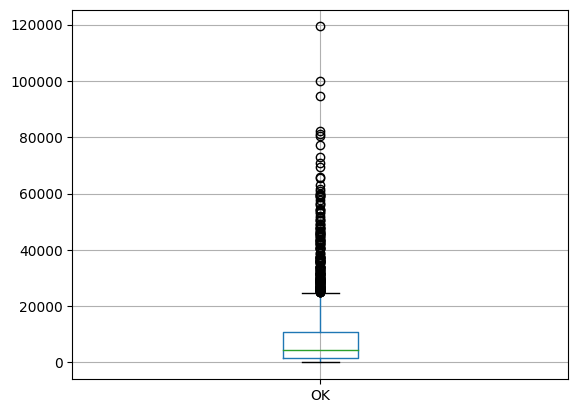

In [ ]:
df1.boxplot(column = ['OK'])

<Axes: >

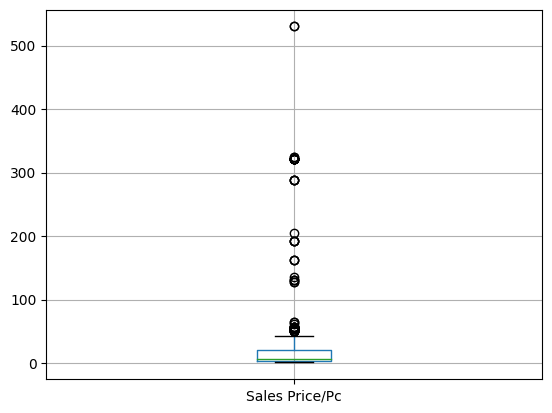

In [ ]:
df1.boxplot(column = ['Sales Price/Pc'])

<Axes: >

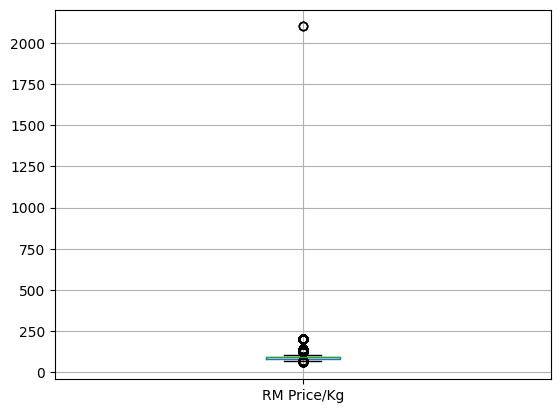

In [ ]:
df1.boxplot(column = ['RM Price/Kg'])

<Axes: >

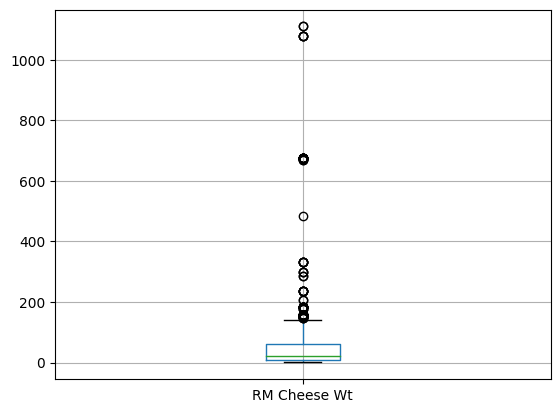

In [ ]:
df1.boxplot(column = ['RM Cheese Wt'])

# Check Missing Vakues

In [ ]:
df1.isnull().sum()[df1.isnull().sum()>0]

Part No             3
Sales Price/Pc    120
RM Price/Kg       166
RM Grade          145
Conditions        395
RM Size           221
dtype: int64

**Replacing NULL values in Numerical Columns using** **Median**

In [ ]:
median1 = df1['Sales Price/Pc'].median()
median2 = df1['RM Price/Kg'].median()
median3 = df1['RM Size'].median()

df1['Sales Price/Pc'].replace(np.nan,median1,inplace =True)
df1['RM Price/Kg'].replace(np.nan,median2,inplace =True)
df1['RM Size'].replace(np.nan,median3,inplace =True)

**Replacing NULL values in Categorical Columns using Mode**

In [ ]:
mode1=df1["RM Grade"].mode().values[0]
mode2 = df1["Conditions"].mode().values[0]

df1['RM Grade']=df1['RM Grade'].replace(np.nan,mode1)
df1['Conditions']=df1['Conditions'].replace(np.nan,mode2)

In [ ]:
df1.isnull().sum()

Date                         0
Part No                      3
Part Desc                    0
Reg/Non Reg                  0
Monthly Part Freq            0
Monthly Part Freq Numeric    0
Customer                     0
Customer Rank                0
Customer rank Numeric        0
OK                           0
Rej                          0
Rework                       0
Sales Price/Pc               0
RM Price/Kg                  0
RM Cheese Wt                 0
RM Grade                     0
Conditions                   0
RM Size                      0
Crack                        0
Plating Issues               0
Total Sales                  0
dtype: int64

**Univariate Analysis**

In [ ]:
# Create a column of Total sales = Number of OK Pcs* Sales Price/Pc

df1["Total_Sales"] = df1['OK']*df1['Sales Price/Pc']

In [ ]:
# Each month which customer has top sales value??
df1['Month'] = df1['Date'].dt.month
monthly_customer_sales = df1.groupby(['Month','Customer'])['Total_Sales'].sum().reset_index()

In [ ]:
# Sort the data by sales in descending order and get the top 10 customers
top_70_customers = monthly_customer_sales.sort_values(by='Total_Sales', ascending=False).head(70)

In [ ]:
top_70_customers.sort_values(by='Month')

,Month,Customer,Total_Sales
26,1,VIBRACOUSTIC,1.080252e+06
13,1,GATES,3.574150e+06
10,1,FAURECIA,1.027437e+06
3,1,ASHIMORI,1.197011e+06
6,1,CONTINENTAL,6.426566e+05
...,...,...,...
193,8,FAURECIA,1.877446e+06
190,8,CUMMINS,1.857008e+06
201,8,SML,1.013040e+06
196,8,KOHLER,6.810362e+05


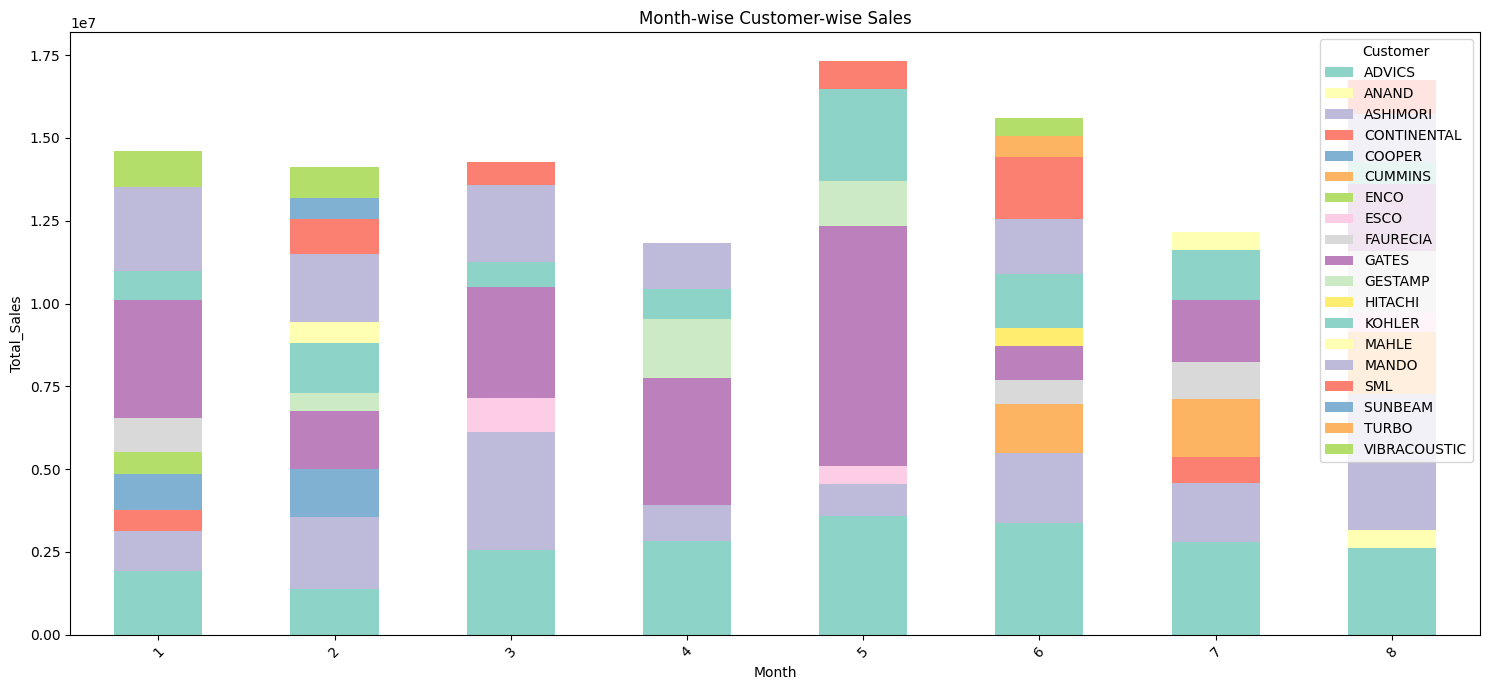

In [ ]:
# Pivot the data for plotting

pivot_data = top_70_customers.pivot(index='Month', columns='Customer', values='Total_Sales')
plt.rcParams['figure.figsize'] = (15, 7)

# Define a custom color palette (you can change this to any other palette)
custom_palette = sns.color_palette("Set3", n_colors=len(pivot_data.columns))
# Plotting the graph
pivot_data.plot(kind='bar', stacked=True,color=custom_palette)
plt.xlabel('Month')
plt.ylabel('Total_Sales')
plt.title('Month-wise Customer-wise Sales')
plt.legend(title='Customer', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**There are six customers who have Regular Sales as well as have Top Contribution in sales are :                   
  1.Gates 2.Ashimori 3.Advics 4.Mando 5.Kohler 6.SML**

In [ ]:
# Total customer wise cumulative sales upto now:

Aggregated_sales = df1.groupby(by = 'Customer')['Total_Sales'].sum().sort_values(ascending=False)
Aggregated_sales.head(10)

Customer
GATES           2.462823e+07
ADVICS          2.101735e+07
ASHIMORI        1.700907e+07
MANDO           1.223457e+07
KOHLER          1.061949e+07
SML             6.719935e+06
CUMMINS         5.813746e+06
FAURECIA        5.584799e+06
GESTAMP         4.181928e+06
VIBRACOUSTIC    3.988768e+06
Name: Total_Sales, dtype: float64

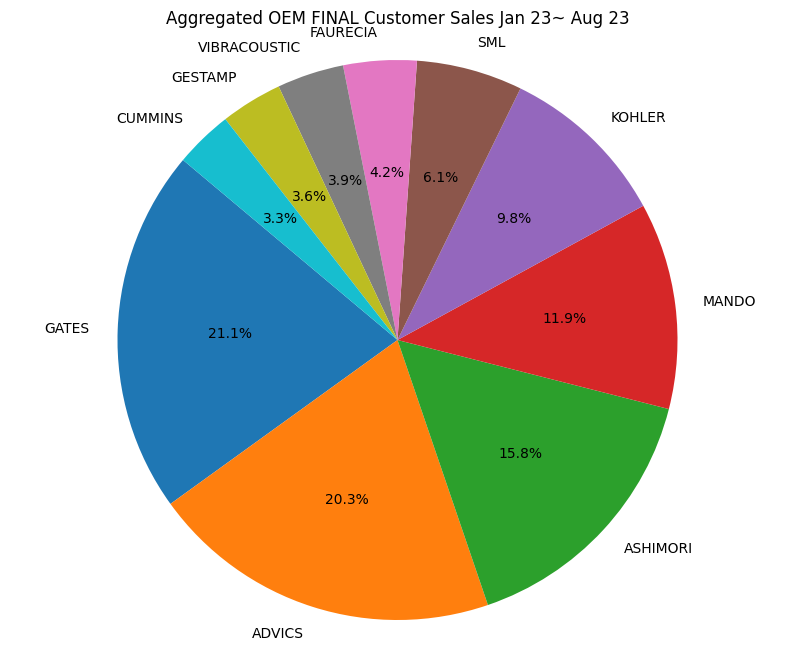

In [ ]:
# Data
companies = ['GATES', 'ADVICS', 'ASHIMORI', 'MANDO', 'KOHLER', 'SML', 'FAURECIA', 'VIBRACOUSTIC', 'GESTAMP', 'CUMMINS']
values = [2.109839e+07, 2.032028e+07, 1.582643e+07, 1.194487e+07, 9.823218e+06, 6.137596e+06, 4.236218e+06, 3.865030e+06, 3.568873e+06, 3.354997e+06]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=companies, autopct='%1.1f%%', startangle=140)
plt.title("Aggregated OEM FINAL Customer Sales Jan 23~ Aug 23")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

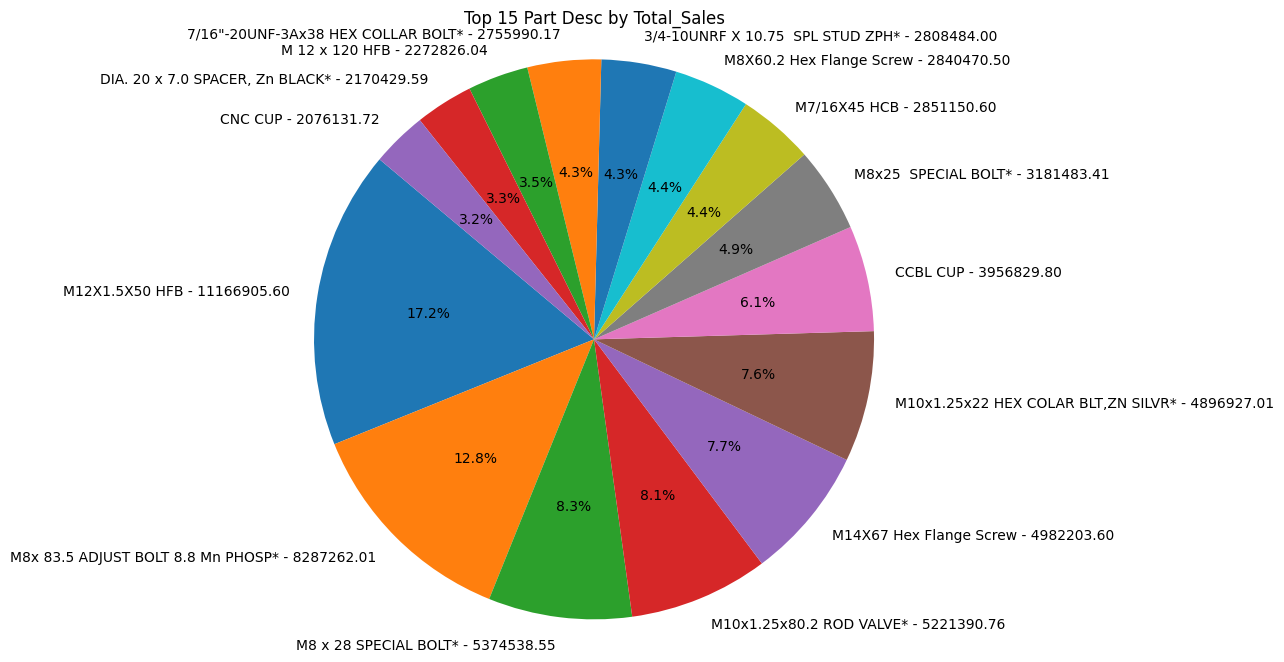

In [ ]:
# Group by 'Part Desc' and calculate the sum of 'Total_Sales'
part_sales = df1.groupby('Part Desc')['Total_Sales'].sum().reset_index()

# Sort the DataFrame by 'Total_Sales' in descending order
part_sales = part_sales.sort_values(by='Total_Sales', ascending=False)

# Select the top 15 parts
top_15_parts = part_sales.head(15)

# Create labels with both part description and Total_Sales value
labels = [f'{part} - {sales:.2f}' for part, sales in zip(top_15_parts['Part Desc'], top_15_parts['Total_Sales'])]

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_15_parts['Total_Sales'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Part Desc by Total_Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Top Customer Sales Monthly Trend**

In [ ]:
# Filter data for the selected customers
selected_customers = ["ADVICS", "ASHIMORI", "GATES", "SML", "KOHLER", "MANDO"]
filtered_data = df1[df1["Customer"].isin(selected_customers)]

In [ ]:
# Group data by Customer and Date and sum the sales values
grouped_data = filtered_data.groupby([filtered_data["Customer"], filtered_data["Date"].dt.to_period("M")])["Total_Sales"].sum().reset_index()

In [ ]:
# Convert the Period back to a string for plotting
grouped_data["Date"] = grouped_data["Date"].dt.strftime("%Y-%m")

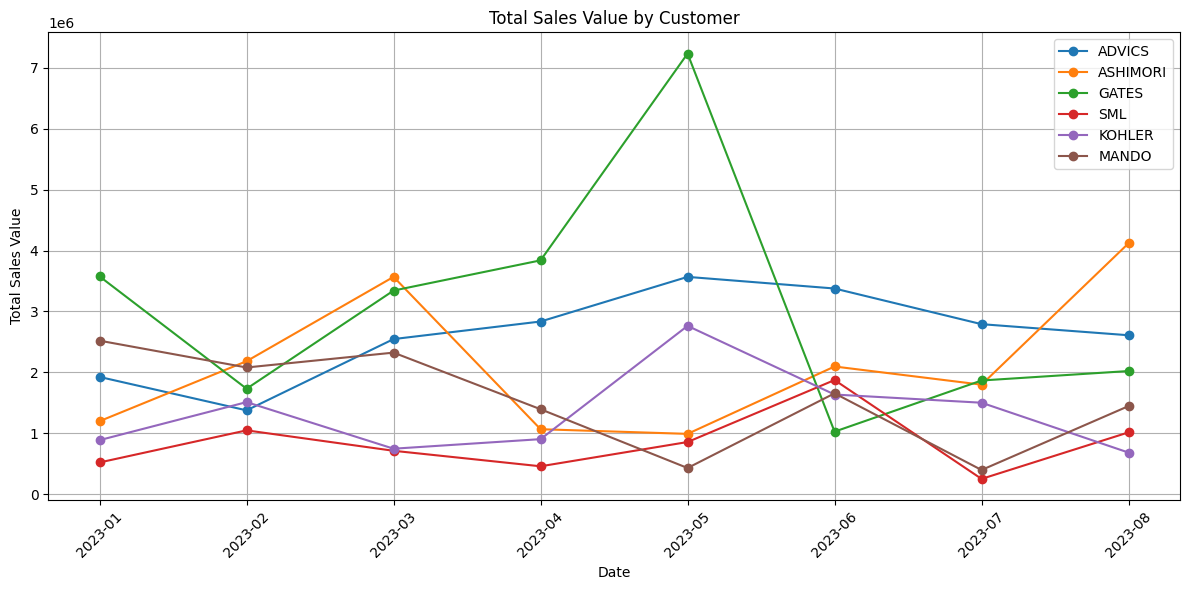

In [ ]:
# Create a line chart for each customer
plt.figure(figsize=(12, 6))
for customer in selected_customers:
    customer_data = grouped_data[grouped_data["Customer"] == customer]
    plt.plot(customer_data["Date"], customer_data["Total_Sales"], marker='o', label=customer)

plt.title("Total Sales Value by Customer")
plt.xlabel("Date")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Aggreted sorted OK QTY part wise upto Aug 23
Agg_Qty = df1.groupby(['Part Desc','Customer'])['OK'].sum().sort_values(ascending=False)
Agg_Qty.head(30)

Part Desc                            Customer    
M8x1.25x17 SPL HEAD BOLT GR 8.8*     FAURECIA        1737118
M4x8.0 SPL PAN HEAD Zn PLAT GR 6.8*  CONTINENTAL     1173644
M10x1.25x22 HEX COLAR BLT,ZN SILVR*  ASHIMORI         973699
M8 x 28 SPECIAL BOLT*                ADVICS           928245
M8x 83.5 ADJUST BOLT 8.8 Mn PHOSP*   MANDO            629253
D50x1.8x 12 TORX HD DELTA PT SCREW*  MAHLE            623391
M8x25  SPECIAL BOLT*                 ADVICS           549479
M3x10 TORX SCREW GR 9.8T PFZN5C*     MANDO            512307
M 6 x 12 SHCS                        KOHLER           500752
DIA 3 X 6.5 RETAINER BALL*           RANE             488086
M4 x 0.7 x 9.5  BOLT WITH  WASHER *  MANDO            478323
DIA.8x21.6 LOCK PIN*                 ASHIMORI         475632
M6x10.2 SERATTED HHS GR 8.8*         CONTINENTAL      431972
M6X20 ROUND HEAD                     MANDO            426407
DIA. 20 x 7.0 SPACER, Zn BLACK*      ASHIMORI         418388
M10 x 1.25 HEX NUT                 

**Name of Parts,customer which are regular in all 8 months & monthly sum of qty**

In [ ]:
# Group by 'Part Desc', 'Customer', and 'Month', and calculate the monthly sum of 'OK'
monthly_sum = df1.groupby(['Part Desc', 'Customer', 'Month'])['OK'].sum().sort_values(ascending =False).reset_index()
monthly_sum.sort_values(by = 'Part Desc',ascending = False).head(5)


,Part Desc,Customer,Month,OK
626,SPL DIN 610 M18 X60 12.9 Geomat *,ESCO,8,991
627,SPL DIN 609 M24 X85 12.9 Geomat *,ESCO,7,978
303,M8x95 Stud,GROHE,1,18631
503,M8x8 Flange Nut Gr 10,GATES,5,5374
209,M8x8 Flange Nut Gr 10,GATES,6,30460


In [ ]:
# Group by 'Part Desc' and count the number of occurrences
part_counts = monthly_sum.groupby('Part Desc').size().reset_index(name='count')

# Filter parts that appeared more than 3 times
filtered_parts = part_counts[part_counts['count'] > 3]

# Filter the original DataFrame based on the filtered_parts list
filtered_df = monthly_sum[monthly_sum['Part Desc'].isin(filtered_parts['Part Desc'])]

# Print the filtered DataFrame
filtered_df.sort_values(by ='Month').head(5).reset_index()


,index,Part Desc,Customer,Month,OK
0,218,M10x1.25x80.2 ROD VALVE*,ADVICS,1,29022
1,85,M8 x 28 SPECIAL BOLT*,ADVICS,1,69883
2,196,M8x25 HEX FLANGE BOLT B16 Cu PLAT*,FORCE,1,33005
3,80,M3x10 TORX SCREW GR 9.8T PFZN5C*,MANDO,1,74140
4,204,DIA 3 X 6.5 RETAINER BALL*,RANE,1,30700


In [ ]:
unique_values_count = filtered_df['Part Desc'].unique()
# Create a DataFrame to display the unique part names
unique_part_names_df = pd.DataFrame({'Part Desc': unique_values_count})
Regular_Parts = unique_part_names_df.merge(df1,on="Part Desc",how ='left')

# Display the DataFrame
Regular_Parts.head(5)

,Part Desc,Date,Part No,Reg/Non Reg,Monthly Part Freq,Monthly Part Freq Numeric,Customer,Customer Rank,Customer rank Numeric,OK,...,RM Price/Kg,RM Cheese Wt,RM Grade,Conditions,RM Size,Crack,Plating Issues,Total Sales,Total_Sales,Month
0,M8x1.25x17 SPL HEAD BOLT GR 8.8*,2023-01-02,U621,Regular,A,97.0,FAURECIA,C,2,7800,...,84.0,8.5,10B21,SAIP,7.8,65,0,9204.00,9204.00,1
1,M8x1.25x17 SPL HEAD BOLT GR 8.8*,2023-01-03,U621,Regular,A,97.0,FAURECIA,C,2,31586,...,84.0,8.5,10B21,SAIP,7.8,188,9150,37271.48,37271.48,1
2,M8x1.25x17 SPL HEAD BOLT GR 8.8*,2023-01-06,U621,Regular,A,97.0,FAURECIA,C,2,28932,...,84.0,8.5,10B21,SAIP,7.8,226,1777,34139.76,34139.76,1
3,M8x1.25x17 SPL HEAD BOLT GR 8.8*,2023-01-07,U621,Regular,A,97.0,FAURECIA,C,2,9725,...,84.0,8.5,10B21,SAIP,7.8,67,241,11475.50,11475.50,1
4,M8x1.25x17 SPL HEAD BOLT GR 8.8*,2023-01-12,U621,Regular,A,97.0,FAURECIA,C,2,5500,...,84.0,8.5,10B21,SAIP,7.8,140,50,6490.00,6490.00,1


In [ ]:
unique_values_count

array(['M8x1.25x17 SPL HEAD BOLT GR 8.8*',
       'M4x8.0 SPL PAN HEAD Zn PLAT GR 6.8*',
       'M10x1.25x22 HEX COLAR BLT,ZN SILVR*', 'M8x25  SPECIAL BOLT*',
       'M8 x7.4 Flange Nut Gr 10', 'D50x1.8x 12 TORX HD DELTA PT SCREW*',
       'M8 x 28 SPECIAL BOLT*', 'M 6 x 12 SHCS',
       'M6X12 SPL PH. DRIVE GR 8.8 GEOMET*',
       'M6x10.2 SERATTED HHS GR 8.8*', 'M3x10 TORX SCREW GR 9.8T PFZN5C*',
       'M8x 83.5 ADJUST BOLT 8.8 Mn PHOSP*', 'M6X20 ROUND HEAD',
       'D8x27.2 Spl Rivet', 'DIA.8x21.6 LOCK PIN*',
       'DIA 5.5x9.3 SPL PIN COLLAR Zn Ni*', 'DIA 3 X 6.5 RETAINER BALL*',
       'M 8 x 40 SHCS', 'M4 x 0.7 x 9.5  BOLT WITH  WASHER *',
       'M8x26.8 ROUND HD WITH DOG & KNURL*',
       'DIA 14 X 30 SPL RIVET PLAIN*', 'DIA 8 X 19.2 SPL RIVET PLAIN*',
       'M6x1x29 SOCKET SET SCREW *', 'M12X1.5X50 HFB',
       'DIA. 20 x 7.0 SPACER, Zn BLACK*', 'M10 x 1.25 HEX NUT',
       'M7/16X45 HCB', 'M8X25 HFS', 'M 6 x 40 SHCS',
       '3/32"x 0.375" ARMREST RIVET X104*',
       'M10

In [ ]:
# Non Regular Parts
# Filter parts that appeared more than 3 times
filtered_parts_less_than_3 = part_counts[part_counts['count'] < 3]

# Filter the original DataFrame based on the filtered_parts list
filtered_df_1 = monthly_sum[monthly_sum['Part Desc'].isin(filtered_parts_less_than_3['Part Desc'])]

# Print the filtered DataFrame
filtered_df_1.sort_values(by ='Month').head(5).reset_index()


,index,Part Desc,Customer,Month,OK
0,452,M12x1.5x50 SPL HHB GR10.9 PLAIN*,SUNBEAM,1,7914
1,245,M 6 x 19 WELD SCREW,SIGMA,1,25312
2,299,M 8 x 13,FCI,1,19050
3,302,M12 X1.75 X25 HEX HEAD F/T,KOHLER,1,18688
4,303,M8x95 Stud,GROHE,1,18631


In [ ]:
unique_values_count_1 = filtered_df_1['Part Desc'].unique()
# Create a DataFrame to display the unique part names
unique_part_names_df_1 = pd.DataFrame({'Part Desc': unique_values_count_1})
Non_Regular_Parts = unique_part_names_df_1.merge(df1,on="Part Desc",how ='left')

# Display the DataFrame
Non_Regular_Parts.head(5)

,Part Desc,Date,Part No,Reg/Non Reg,Monthly Part Freq,Monthly Part Freq Numeric,Customer,Customer Rank,Customer rank Numeric,OK,...,RM Price/Kg,RM Cheese Wt,RM Grade,Conditions,RM Size,Crack,Plating Issues,Total Sales,Total_Sales,Month
0,M2.2x6 SELF TAPPING SCREW*,2023-05-03,3137,Non Regular,D,3.0,TURBO,D,0,16000,...,90.49,0.2,10B21,SAIP,10.30,40,0,43360.0,43360.0,5
1,M2.2x6 SELF TAPPING SCREW*,2023-05-04,3137,Non Regular,D,3.0,TURBO,D,0,60000,...,90.49,0.2,10B21,SAIP,10.30,40,0,162600.0,162600.0,5
2,M2.2x6 SELF TAPPING SCREW*,2023-08-22,3137,Non Regular,D,3.0,TURBO,D,0,30000,...,90.49,0.2,10B21,SAIP,10.30,0,0,81300.0,81300.0,8
3,M8X24.8 Round Head,2023-01-11,U968,Non Regular,D,8.0,PHA,B,2,12990,...,84.00,18.0,10B21,SAIP,10.45,0,234,68847.0,68847.0,1
4,M8X24.8 Round Head,2023-01-16,U968,Non Regular,D,8.0,PHA,B,2,605,...,84.00,18.0,10B21,SAIP,10.45,0,9,3206.5,3206.5,1


In [ ]:
unique_values_count_1

array(['M2.2x6 SELF TAPPING SCREW*', 'M8X24.8 Round Head',
       'M 13 x 28.80 LOCATING PIN', 'M 8 x 13',
       'M8 x 13 HEX FLANGE BOLT  BLACK*', 'M6 X 20 Hex Flange Screw',
       'DIA 4  X 9.8 SPL DOWEL PIN PLAIN*', 'M12 X1.75 X25 HEX HEAD F/T',
       'M10 x1.5 x 20 Button Head Torx Screw', 'M 6 x 16 CSK',
       'D50x1.8x 16 TORX HD DELTA PT SCREW*', 'M12 X42.3 HFS',
       'M5x29.5 SPL HEX FLANGE BOLT*', 'M 8 x 20 SHCS',
       'M5 X0.8 X16 CSK F/T', 'M 8 x 22 HHS', 'M8X40 SHCS',
       'M8x8 Flange Nut Gr 10', 'M 10 x 31.5 HF', 'M 6 x 16 SHCS',
       'M 10 x 1.25 x 25 ', 'M 8 x 35 SHCS', 'M 6 x 19 WELD SCREW',
       'M10x1.25x25 HEX FLANGE GR 8T ZTVWP*', 'M7/16*10 G NUT',
       'M 10 x 115 HFB', 'DIA 5x8.4 SPL ROUND HD PIN Zn PLAT*',
       'M8x55 SPL STUD GR8.8  Zn PLAT*', 'M 6 x 25 HEX FLANGE',
       'M 16 x 1.0 x 16.50 HEX S.B.', 'M8 x 1.25 x 28 BOLT CLINCH , B/B*',
       'M8x95 Stud', 'BLIND RIVIT', 'M8x1x10 HEX FLANGE GR8.8 ZTVYP*',
       'M 5 x 13 W/O WASHER', 'DIN

In [ ]:
Non_Regular_Parts.to_excel("Non Regular Parts.xlsx")

#I want to know which parts are coming frequently on monthly basis

<Figure size 1500x3000 with 0 Axes>

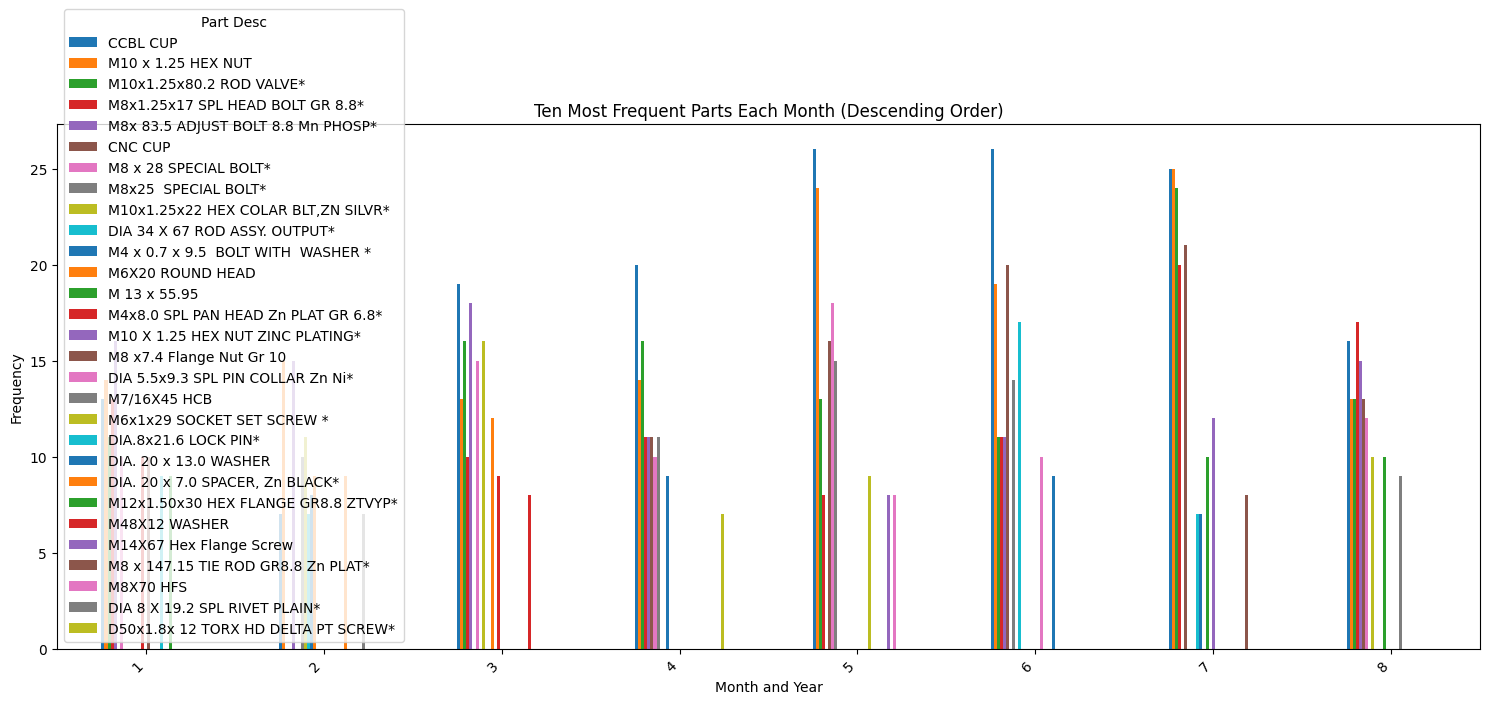

In [ ]:
# Find the three most frequent parts for each month and sort them in descending order

# Group the data by 'Month' and count the occurrences of each part
part_counts = df1['Part Desc'].groupby(df1['Month']).value_counts()

# Find the three most frequent parts for each month and sort them in descending order
most_frequent_parts = part_counts.groupby(level=0).nlargest(10).reset_index(level=1, drop=True)
most_frequent_parts = most_frequent_parts.unstack().fillna(0)
most_frequent_parts = most_frequent_parts[most_frequent_parts.sum().sort_values(ascending=False).index]

# Plot a bar chart
plt.figure(figsize=(15, 30))
most_frequent_parts.plot(kind='bar', stacked=False)
plt.xlabel('Month and Year')
plt.ylabel('Frequency')
plt.title('Ten Most Frequent Parts Each Month (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by 'Customer', 'Part Desc', and 'Month' and count the occurrences
customer_part_counts = df1.groupby(['Customer', 'Part Desc', 'Month']).size().reset_index(name='Frequency')

# Pivot the table to show a customer's part descriptions and frequency on a monthly basis
pivot_table = customer_part_counts.pivot_table(index=['Customer', 'Part Desc'], columns='Month', values='Frequency', fill_value=0)

# Reset the index to make it cleaner
pivot_table.reset_index(inplace=True)

# Add a column for the sum horizontally
pivot_table['Sum'] = pivot_table.iloc[:, 2:].sum(axis=1)
pivot_table

Month,Customer,Part Desc,1,2,3,4,5,6,7,8,Sum
0,ADIENT,"3/32""x 0.375"" ARMREST RIVET X104*",3,5,1,0,4,1,0,1,15
1,ADIENT,BLIND RIVIT,0,3,0,0,0,0,0,0,3
2,ADMACH,DIA 8 X 19.2 SPL RIVET PLAIN*,0,7,0,0,0,2,2,4,15
3,ADMACH,DIA 8 X 19.6 SPL RIVET PLAIN*,0,0,0,0,0,0,2,0,2
4,ADVICS,ASEMBLY BOOSTR PIN(D20011-23689)*,5,0,0,0,5,0,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...
206,VIBRACOUSTIC,M5 X0.8 X16 CSK F/T,3,0,0,0,0,0,0,0,3
207,VIBRACOUSTIC,M6 x16 Weld Screw,0,0,0,1,0,0,0,0,1
208,VITESCO,M4x8.0 SPL PAN HEAD Zn PLAT GR 6.8*,0,0,1,0,0,0,0,0,1
209,WABCO,M6x1x29 SOCKET SET SCREW *,2,2,5,3,9,0,0,6,27


In [ ]:
pivot_table.to_excel("Monthly_Part_Freq.xlsx")

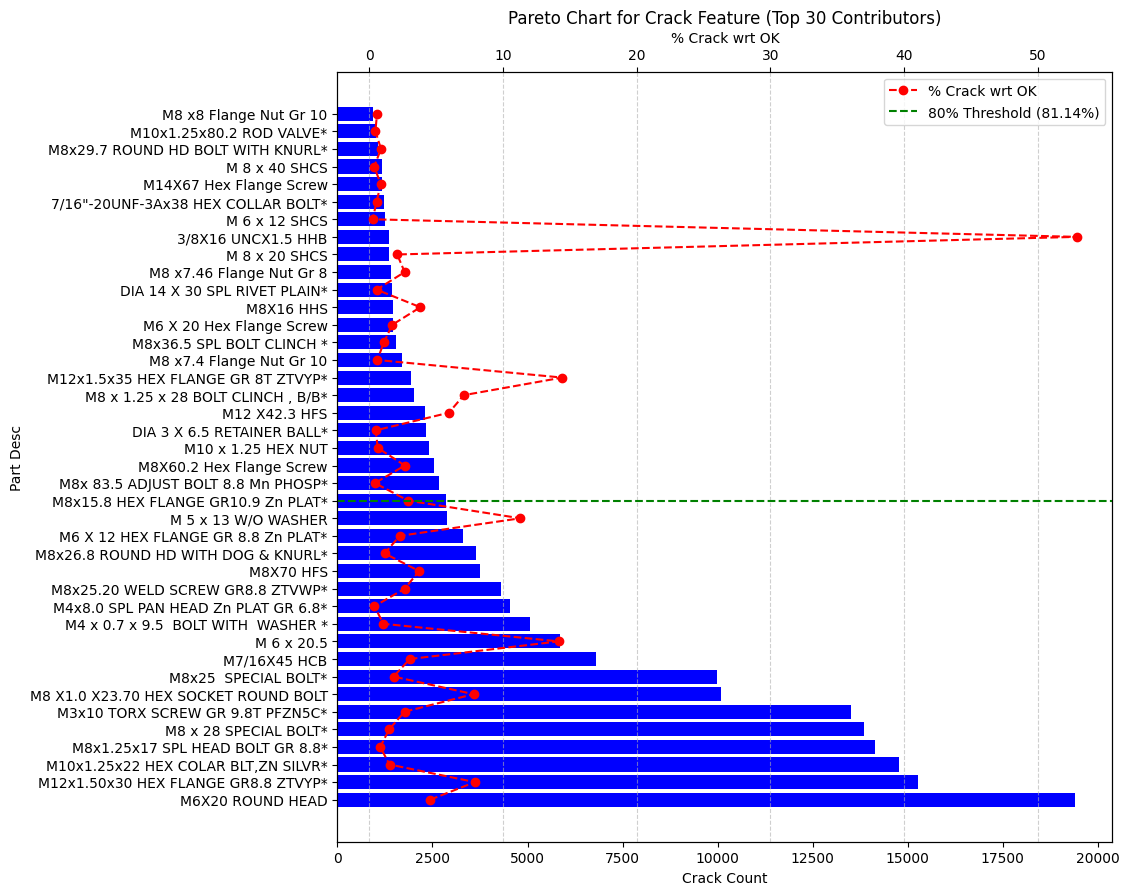

The 'M8x15.8 HEX FLANGE GR10.9 Zn PLAT*' Part Desc contributes to 80% of the total crack count.


In [ ]:
# Group by "Part Desc" and sum the "Crack" and "OK" quantities
df_grouped = df1.groupby("Part Desc")[["Crack", "OK"]].sum().reset_index()

# Sort the grouped DataFrame by the "Crack" column in descending order
df_grouped = df_grouped.sort_values(by="Crack", ascending=False)

# Select the top 40 rows
df_grouped = df_grouped.head(40)

# Calculate the cumulative sum of "Crack" and "OK"
df_grouped["Cumulative Crack"] = df_grouped["Crack"].cumsum()
df_grouped["Cumulative OK"] = df_grouped["OK"].cumsum()

# Calculate the percentage of "Crack" relative to "OK"
df_grouped["Crack (%)"] = (df_grouped["Crack"] / df_grouped["OK"]) * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.barh(df_grouped["Part Desc"], df_grouped["Crack"], color="b", label="Crack Count")
ax1.set_xlabel("Crack Count")
ax1.set_ylabel("Part Desc")
ax1.tick_params(axis="y")

ax2 = ax1.twiny()
ax2.plot(df_grouped["Crack (%)"], df_grouped["Part Desc"], color="r", marker="o", linestyle="--", label="% Crack wrt OK")
ax2.set_xlabel("% Crack wrt OK")
ax2.tick_params(axis="x")

plt.title("Pareto Chart for Crack Feature (Top 30 Contributors)")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Find the point where 80% of the crack contribution is reached
threshold = 80
index_80_percent = (df_grouped["Cumulative Crack"] / df_grouped["Crack"].sum() * 100 >= threshold).idxmax()
part_desc_80_percent = df_grouped.loc[index_80_percent, "Part Desc"]
percent_80 = df_grouped.loc[index_80_percent, "Cumulative Crack"] / df_grouped["Crack"].sum() * 100

plt.axhline(y=part_desc_80_percent, color='g', linestyle='--', label=f'{threshold}% Threshold ({percent_80:.2f}%)')

plt.legend()
plt.show()

print(f"The '{part_desc_80_percent}' Part Desc contributes to {threshold}% of the total crack count.")


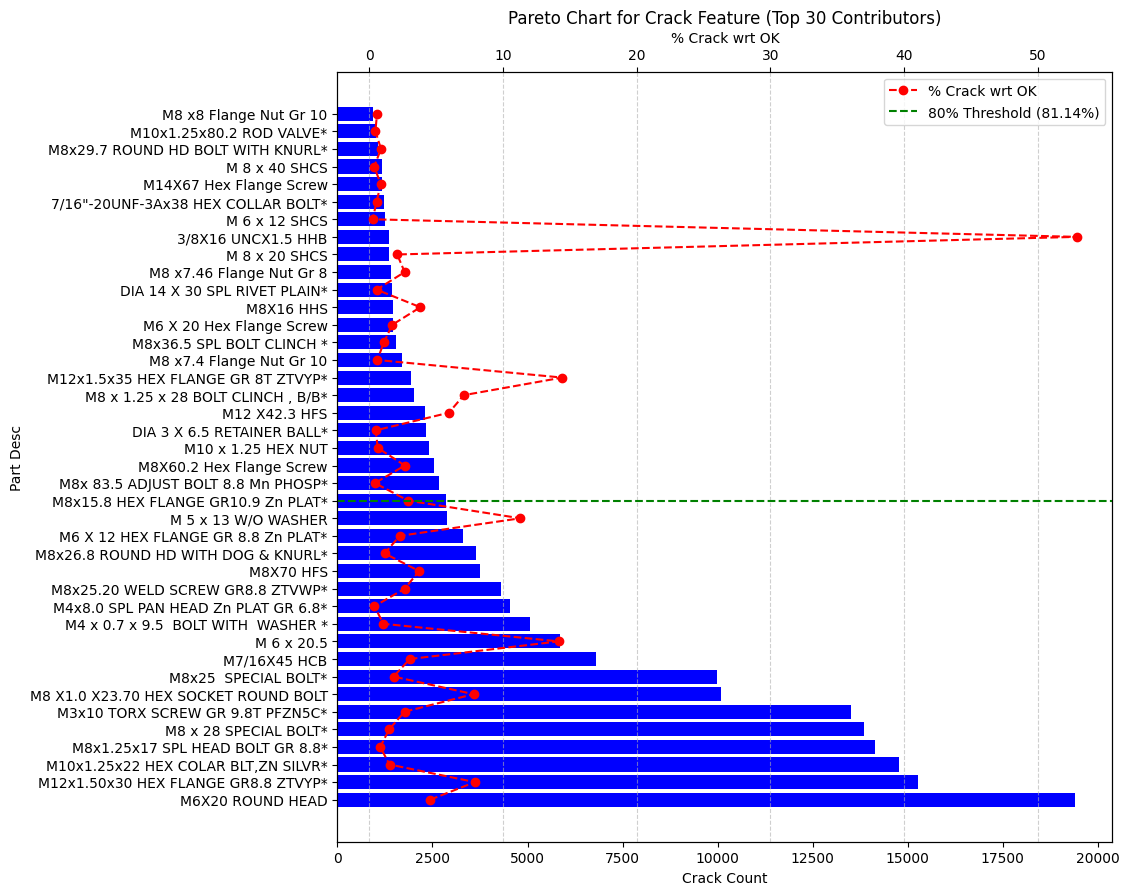

The 'M8x15.8 HEX FLANGE GR10.9 Zn PLAT*' Part Desc contributes to 80% of the total crack count.


In [ ]:
# Group by "Part Desc" and sum the "Crack" and "OK" quantities
df_grouped = df1.groupby("Part Desc")[["Crack", "OK"]].sum().reset_index()

# Sort the grouped DataFrame by the "Crack" column in descending order
df_grouped = df_grouped.sort_values(by="Crack", ascending=False)

# Select the top 40 rows
df_grouped = df_grouped.head(40)

# Calculate the cumulative sum of "Crack" and "OK"
df_grouped["Cumulative Crack"] = df_grouped["Crack"].cumsum()
df_grouped["Cumulative OK"] = df_grouped["OK"].cumsum()

# Calculate the percentage of "Crack" relative to "OK"
df_grouped["Crack (%)"] = (df_grouped["Crack"] / df_grouped["OK"]) * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.barh(df_grouped["Part Desc"], df_grouped["Crack"], color="b", label="Crack Count")
ax1.set_xlabel("Crack Count")
ax1.set_ylabel("Part Desc")
ax1.tick_params(axis="y")

ax2 = ax1.twiny()
ax2.plot(df_grouped["Crack (%)"], df_grouped["Part Desc"], color="r", marker="o", linestyle="--", label="% Crack wrt OK")
ax2.set_xlabel("% Crack wrt OK")
ax2.tick_params(axis="x")

plt.title("Pareto Chart for Crack Feature (Top 30 Contributors)")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Find the point where 80% of the crack contribution is reached
threshold = 80
index_80_percent = (df_grouped["Cumulative Crack"] / df_grouped["Crack"].sum() * 100 >= threshold).idxmax()
part_desc_80_percent = df_grouped.loc[index_80_percent, "Part Desc"]
percent_80 = df_grouped.loc[index_80_percent, "Cumulative Crack"] / df_grouped["Crack"].sum() * 100

plt.axhline(y=part_desc_80_percent, color='g', linestyle='--', label=f'{threshold}% Threshold ({percent_80:.2f}%)')

plt.legend()
plt.show()

print(f"The '{part_desc_80_percent}' Part Desc contributes to {threshold}% of the total crack count.")


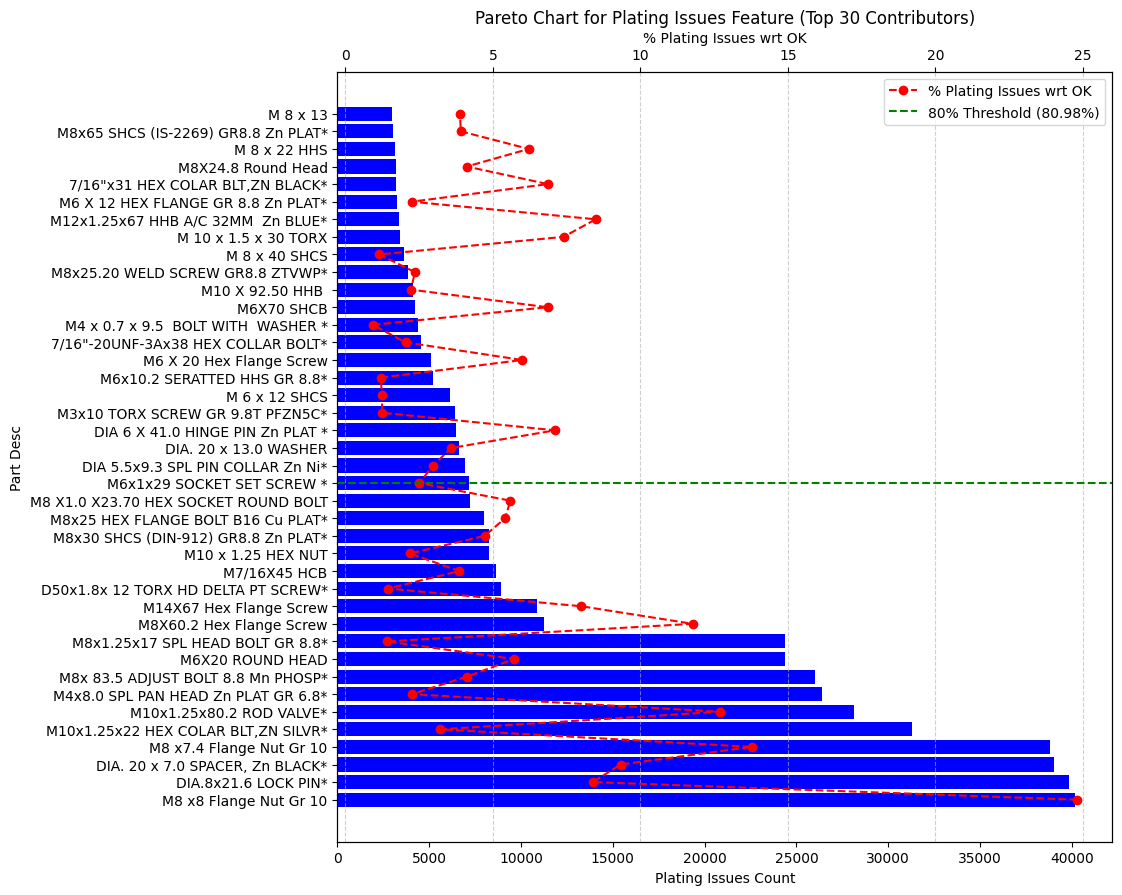

The 'M6x1x29 SOCKET SET SCREW *' Part Desc contributes to 80% of the total Plating Issues count.


In [ ]:
# Group by "Part Desc" and sum the "Plating Issues" and "OK" quantities
df_grouped = df1.groupby("Part Desc")[["Plating Issues", "OK"]].sum().reset_index()

# Sort the grouped DataFrame by the "Plating Issues" column in descending order
df_grouped = df_grouped.sort_values(by="Plating Issues", ascending=False)

# Select the top 40 rows
df_grouped = df_grouped.head(40)

# Calculate the cumulative sum of "Plating Issues" and "OK"
df_grouped["Cumulative Plating Issues"] = df_grouped["Plating Issues"].cumsum()
df_grouped["Cumulative OK"] = df_grouped["OK"].cumsum()

# Calculate the percentage of "Plating Issues" relative to "OK"
df_grouped["Plating Issues (%)"] = (df_grouped["Plating Issues"] / df_grouped["OK"]) * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.barh(df_grouped["Part Desc"], df_grouped["Plating Issues"], color="b", label="Plating Issues Count")
ax1.set_xlabel("Plating Issues Count")
ax1.set_ylabel("Part Desc")
ax1.tick_params(axis="y")

ax2 = ax1.twiny()
ax2.plot(df_grouped["Plating Issues (%)"], df_grouped["Part Desc"], color="r", marker="o", linestyle="--", label="% Plating Issues wrt OK")
ax2.set_xlabel("% Plating Issues wrt OK")
ax2.tick_params(axis="x")

plt.title("Pareto Chart for Plating Issues Feature (Top 30 Contributors)")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Find the point where 80% of the Plating Issues contribution is reached
threshold = 80
index_80_percent = (df_grouped["Cumulative Plating Issues"] / df_grouped["Plating Issues"].sum() * 100 >= threshold).idxmax()
part_desc_80_percent = df_grouped.loc[index_80_percent, "Part Desc"]
percent_80 = df_grouped.loc[index_80_percent, "Cumulative Plating Issues"] / df_grouped["Plating Issues"].sum() * 100

plt.axhline(y=part_desc_80_percent, color='g', linestyle='--', label=f'{threshold}% Threshold ({percent_80:.2f}%)')

plt.legend()
plt.show()

print(f"The '{part_desc_80_percent}' Part Desc contributes to {threshold}% of the total Plating Issues count.")

In [ ]:
df1.corr()

,Monthly Part Freq Numeric,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Price/Kg,RM Cheese Wt,RM Size,Crack,Plating Issues,Total Sales,Total_Sales,Month
Monthly Part Freq Numeric,1.000000,0.726157,-0.187292,-0.065110,0.037863,-0.047956,0.106364,-0.092154,0.135038,-0.086900,-0.067713,-0.149752,-0.163658,0.102479
Customer rank Numeric,0.726157,1.000000,-0.248230,0.017095,-0.123802,0.047548,0.144394,-0.008400,0.102057,0.006538,-0.083245,-0.091744,-0.107794,0.065171
OK,-0.187292,-0.248230,1.000000,0.200628,0.367462,-0.179715,-0.080490,-0.194274,-0.255398,0.149669,0.229932,0.329919,0.349983,0.011166
Rej,-0.065110,0.017095,0.200628,1.000000,0.166593,-0.092866,-0.000292,-0.100214,-0.115969,0.735297,0.226607,0.061366,0.061487,-0.209500
Rework,0.037863,-0.123802,0.367462,0.166593,1.000000,-0.085078,-0.025584,-0.096645,-0.102004,0.107991,0.646055,0.060464,0.057139,-0.106488
Sales Price/Pc,-0.047956,0.047548,-0.179715,-0.092866,-0.085078,1.000000,0.109813,0.874742,0.261058,-0.078736,-0.052737,0.312512,0.307654,0.037575
RM Price/Kg,0.106364,0.144394,-0.080490,-0.000292,-0.025584,0.109813,1.000000,-0.034619,0.063208,-0.039136,-0.008672,-0.000765,-0.003014,0.042848
RM Cheese Wt,-0.092154,-0.008400,-0.194274,-0.100214,-0.096645,0.874742,-0.034619,1.000000,0.398973,-0.081034,-0.063262,0.236400,0.238270,0.059052
RM Size,0.135038,0.102057,-0.255398,-0.115969,-0.102004,0.261058,0.063208,0.398973,1.000000,-0.113200,-0.037308,0.028813,0.045020,0.077251
Crack,-0.086900,0.006538,0.149669,0.735297,0.107991,-0.078736,-0.039136,-0.081034,-0.113200,1.000000,0.094003,0.062681,0.061047,-0.156656


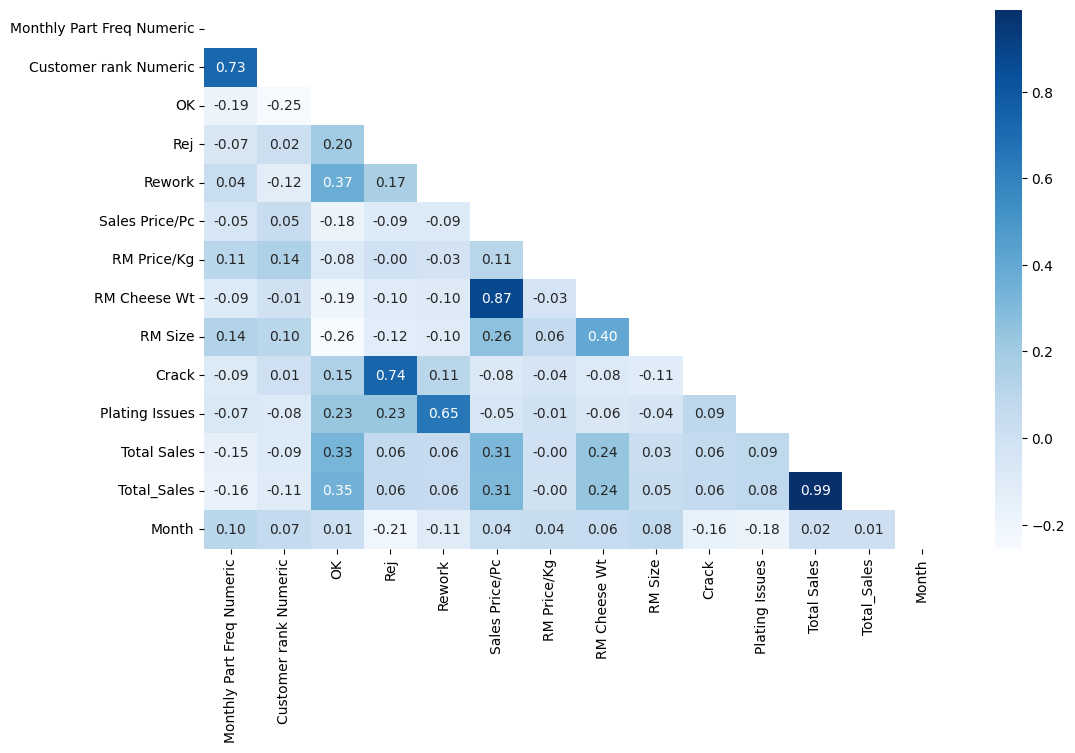

In [ ]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Create a heatmap for the lower half of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', mask=mask)

# Show the plot
plt.show()

# ------------------------------------------------------------**Happy learning**---------------------------------------------



